# Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

## Instructions

Using the starter file provided, walk through the following steps.

* Import libraries and dependencies

* Use the `get_barset()` function to retrieve `3` year's worth of daily prices for `TSLA` stock as a `pandas` DataFrame.

* Build a Monte Carlo simulation that runs `1000` times through `252 * 3` trading days and saves the results:

* Plot the simulated daily returns of `TSLA` stock over the next `3` trading years.

* Plot the simulated profits and losses for a $10,000 investment in TSLA given the simulated cumulative returns.

* Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks with a `95%` confidence interval

  >**Hint:** Remember that a normal probability distribution is just a diagram illustrating the probability of potential outcomes as outcomes deviate closer to or away from the expected average.


In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv('../../../../.env')

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ENV")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY_ENV")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
tickers = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2017-01-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-31", tz="America/New_York").isoformat()

# Set limit_rows to 1000 to retreive the maximum amount of rows
limit_rows = 1000

# Get 3 years worth of historical data for TSLA
ticker_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_rows
).df

ticker_data.head()

C:\Users\dlpst\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:20: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


TSLA                                     
                             open    high       low     close   volume
time                                                                  
2018-02-12 00:00:00-05:00  316.13  318.08  306.2500  315.7100  4772388
2018-02-13 00:00:00-05:00  315.25  324.19  312.5105  323.5000  3494490
2018-02-14 00:00:00-05:00  320.84  326.17  318.5200  322.2229  2944477
2018-02-15 00:00:00-05:00  324.50  334.12  322.4000  334.1200  4555687
2018-02-16 00:00:00-05:00  332.50  343.12  331.6400  335.4900  4446403

### Run the Monte Carlo Simulation

In [4]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_tsla = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)
MC_tsla.portfolio_data.head()

TSLA                                       \
                             open    high       low     close   volume   
time                                                                     
2018-02-12 00:00:00-05:00  316.13  318.08  306.2500  315.7100  4772388   
2018-02-13 00:00:00-05:00  315.25  324.19  312.5105  323.5000  3494490   
2018-02-14 00:00:00-05:00  320.84  326.17  318.5200  322.2229  2944477   
2018-02-15 00:00:00-05:00  324.50  334.12  322.4000  334.1200  4555687   
2018-02-16 00:00:00-05:00  332.50  343.12  331.6400  335.4900  4446403   

                                        
                          daily_return  
time                                    
2018-02-12 00:00:00-05:00          NaN  
2018-02-13 00:00:00-05:00     0.024675  
2018-02-14 00:00:00-05:00    -0.003948  
2018-02-15 00:00:00-05:00     0.036922  
2018-02-16 00:00:00-05:00     0.004100

In [5]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_tsla.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\dlpst\OneDrive\Documents\UC_Berkeley_Blockchain_Bootcamp\GitHub\00_Module_Activities\Module_5\Class_2_Activities\06-Stu_Financial_Forecasting\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010227,0.949363,1.087849,0.983606,1.097102,0.957167,1.020832,1.119448,0.992040,1.092174,...,1.037101,1.038927,0.976756,0.989574,0.971520,0.974367,0.966666,1.020761,0.967138,0.985578
2,1.119399,0.920876,1.042814,1.012965,1.136667,0.991439,1.026258,1.120274,0.976345,1.023655,...,0.997323,1.192619,0.961825,0.954502,0.939437,0.974034,0.994834,0.997070,0.936151,1.016264
3,1.130209,0.944324,1.063136,1.006733,1.114788,0.953735,1.042980,1.118610,0.926816,0.982126,...,1.023381,1.112436,0.982061,0.937329,0.947663,0.973139,1.081007,1.023171,0.951154,0.974706
4,1.085411,0.939480,1.025941,1.106671,1.090273,0.992801,0.968349,1.076401,0.964793,0.952979,...,1.058809,1.179224,0.919114,0.915702,0.980169,0.959322,1.122267,1.050159,0.929851,0.911443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,9.854077,7.558430,4.281886,6.520621,10.824401,15.832456,27.576783,2.747561,24.248490,1.328074,...,0.926419,2.889860,3.559852,1.010206,6.099257,9.861087,19.672809,22.698214,17.122667,1.381087
753,9.392752,7.375719,4.309313,6.821535,10.501820,15.918702,28.492509,2.741647,23.985954,1.276342,...,1.039783,2.610577,3.150332,1.027500,5.647505,10.134535,18.590545,23.870832,15.229602,1.380133
754,9.699659,7.919769,4.419040,7.080060,10.467830,15.989189,27.499006,2.718862,22.909410,1.328344,...,1.048978,2.559284,3.160318,1.010514,6.010988,10.484089,18.458037,24.906605,16.219435,1.353165
755,9.961430,7.868375,4.446188,7.227829,10.232384,14.154369,26.920004,2.376616,21.608882,1.291771,...,1.001701,2.539902,3.202203,0.999530,5.907226,10.958077,18.259870,22.270211,17.684860,1.278125


### Plot the Simulated Daily Returns Trajectory for `TSLA` over the Next Year (252 Trading Days)

In [6]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    'mean': list(MC_tsla.simulated_return.mean(axis=1)),
    'mmedian': list(MC_tsla.simulated_return.median(axis=1)),
    'min': list(MC_tsla.simulated_return.min(axis=1)),
    'max': list(MC_tsla.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
simulated_returns_df = pd.DataFrame(simulated_returns_data)
# Display sample data
simulated_returns_df.head()

,mean,mmedian,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003473,1.003685,0.866232,1.145224
2,1.008740,1.008087,0.796824,1.228227
3,1.009830,1.005696,0.742341,1.288042
4,1.012132,1.007832,0.734161,1.353500


<AxesSubplot:>

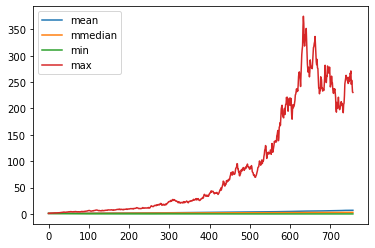

In [7]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
simulated_returns_df.plot()

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [8]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = simulated_returns_df*10000

# Display sample data
cumulative_pnl.head()

,mean,mmedian,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10034.732708,10036.853890,8662.323403,11452.239163
2,10087.401184,10080.874383,7968.240591,12282.266237
3,10098.296017,10056.958744,7423.410223,12880.424373
4,10121.324916,10078.323946,7341.613638,13534.997852


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:>

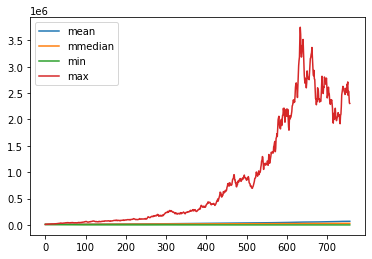

In [9]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot()

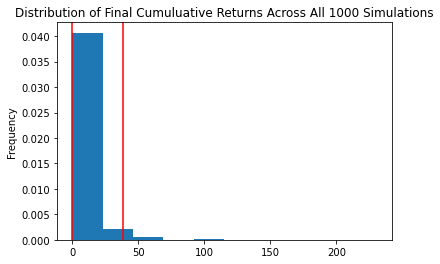

In [14]:
MC_sim_dist_plot = MC_tsla.plot_distribution()

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [10]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tsla.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               6.934913
std               12.947554
min                0.042310
25%                1.178421
50%                2.993616
75%                7.633758
max              230.394035
95% CI Lower       0.197378
95% CI Upper      38.549876
Name: 756, dtype: float64


In [11]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $1973.78 and $385498.76.
